## 線形回帰<br>

・データの「傾向（直線的な関係）」を数式で表す方法<br>

(例)<br>
年齢6歳：身長(cm)164<br>
年齢8歳：身長(cm)187<br>
年齢10歳：身長(cm)237<br>
年齢13歳：身長(cm)264<br>
年齢16歳：身長(cm)282<br>

線形回帰では、関係をこのような式で表す<br>
y=ax+b<br>

・x: 説明変数（例：年齢）<br>
・y: 目的変数（例：身長）<br>
・a: 傾き（xが1増えるとyがどれだけ増えるか）<br>
・b: 切片（x=0のときのyの値）<br>

目的は実際のデータに「できるだけ近い直線（y = ax + b）」を見つけること
<br>
<br>

## 線形回帰のパラメーター更新<br>

・「aとbを任意の値に設定して」<br>

・「実際のデータを用いて、損失関数で誤差を求める」<br>

・「損失関数をaとbの各値で偏微分を繰り返す」<br>

・「勾配降下法で更新することを何回も繰り返すことで、誤差を小さくし学習をする」<br>



41088 回繰り返しました
勾配法で得られた、損失関数を最小にするaとbは
8.477403460299513
145.09863070323775
最終的な平均二乗誤差
344.72719664673


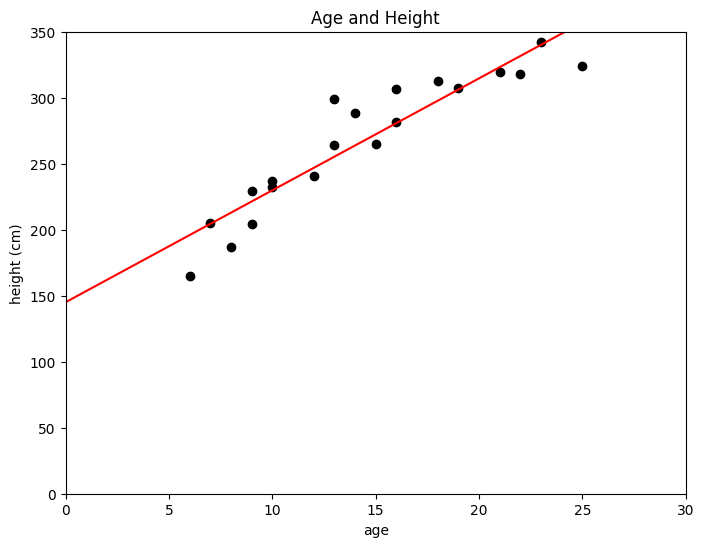

In [5]:
from matplotlib import pyplot as plt
import numpy as np

'''
年齢：説明変数（x）に該当するデータ
身長：目的変数（y）に該当するデータ
両方とも numpy.array 形式で、同じ長さを持つ20個のデータ
'''
年齢 = np.array([6,8,9,7,9,10,10,12,13,15,16,14,13,16,19,18,22,21,25,23])
身長 = np.array([164.61,187.25,204.30,204.88,229.48,231.99,236.59,240.36,263.98,264.79,281.85,288.38,298.75,306.34,307.48,312.44,317.72,319.41,323.96,341.96])

'''
損失関数の定義
・目的：線形回帰モデル
  予測身長 = a × 年齢 + b の 予測値と実際の身長との誤差（二乗誤差）の平均を求める
・引数 パラメタベクトル：
  [a, b] の形で与える
  a は傾き（年齢の係数）
  b は切片（y軸との交点）
'''
def 損失関数(パラメタベクトル): # パラメタベクトル[0]がy=ax+bにおけるa、パラメタベクトル[1]がb
    パラメタa = パラメタベクトル[0]
    パラメタb = パラメタベクトル[1]
    '''
    ・(a × 年齢 + b)：予測された身長
    ・予測 - 実際の身長：予測誤差
    ・**2：その誤差を二乗（負の誤差を正にするため）
    ・np.mean(...)：全データに対する二乗誤差の平均 → 平均二乗誤差（MSE）
    '''
    return np.mean((パラメタa * 年齢 + パラメタb - 身長)**2)

'''
与えられた関数 関数 と、ある点 現在地のベクトル に対して、
各変数（x, y, z, ...）ごとの**偏微分の近似値（傾き）**を求めて
それらを ベクトル形式で返す 関数
多変数関数 関数（例：損失関数）と、その関数を評価したい点 現在地のベクトル（例：パラメータベクトル[a, b]）を引数にとる。
'''
def 偏微分もどき(関数, 現在地のベクトル):
    #現在地のベクトル と同じ形・型の空のベクトルを用意、ここに偏微分結果を順に格納していく
    傾きベクトル = np.empty_like(現在地のベクトル)

    '''
    ・各変数（例えばパラメータ a, b）に対して
      ・その変数に関する偏微分を近似的に計算（→ 偏微分もどきの下請け 関数に任せる）
      ・結果を 傾きベクトル に代入
    '''
    for i in range(len(現在地のベクトル)):
        # 変数のi番目で「偏微分もどきの下請け」に出す
        傾きベクトル[i] = 偏微分もどきの下請け(関数, 現在地のベクトル, i)

    return 傾きベクトル # 確定した傾きベクトルを返す

'''
与えられた関数 関数 と、ある点 現在地のベクトル において、
指定した変数（i番目）に関してのみ、
微小な変化を加えて数値的に偏微分を計算する
'''
def 偏微分もどきの下請け(関数, 現在地のベクトル, i):
    #微分を数値的に近似するための非常に小さな値
    微小な横幅 = 0.0001

    #現在のパラメータベクトルと同じ形のゼロベクトルを用意
    差分計算ベクトル = np.zeros_like(現在地のベクトル)

    '''
    i番目の要素だけを ε（ここでは0.0001）にして、他の要素はゼロのまま
    つまり、「i番目のパラメータだけを微小に変化させる」ベクトルが完成
    '''
    差分計算ベクトル[i] = 微小な横幅

    #i番目の変数に対する中心差分による数値的な偏微分を計算
    return (関数(現在地のベクトル+差分計算ベクトル) - 関数(現在地のベクトル-差分計算ベクトル)) / (2*微小な横幅)

'''
勾配降下法（Gradient Descent）**を使って、関数の最小値（特に最小となるパラメータ）を探索
関数: 最小化したい関数（例：損失関数）
出発地点のベクトル: 最初のパラメータ（例：[a, b] の初期値）
学習率: パラメータをどれだけ更新するかのステップサイズ
最大繰り返し数: 無限ループ防止のための制限回数
'''
def 勾配法(関数, 出発地点のベクトル, 学習率=0.001, 最大繰り返し数=100000):

    #現在の位置（パラメータ）を記録
    現在地のベクトル = 出発地点のベクトル

    #収束判定用の基準：勾配の絶対値が0.001未満なら終了
    収束条件の傾き = 0.001

    #最大で 最大繰り返し数 回までループ（=学習）
    for i in range(最大繰り返し数):

        # 今のパラメータにおける関数の勾配（偏微分）を計算
        傾きベクトル = 偏微分もどき(関数, 現在地のベクトル)

        #勾配の方向に「下る」ようにパラメータを更新
        現在地のベクトル = 現在地のベクトル - 学習率 * 傾きベクトル

        #勾配ベクトル（傾き）が十分に小さい → ほぼ平ら → 収束したと判断
        if abs(傾きベクトル[0]) < 収束条件の傾き and abs(傾きベクトル[1]) < 収束条件の傾き and i > 0:
            break

    #最小値（最終的なパラメータ）を返す
    #何回繰り返したかを表示
    print(str(i)+" 回繰り返しました")
    return 現在地のベクトル


#損失関数（＝平均二乗誤差）を最小にする a, b を探す
最小値 = 勾配法(損失関数, [5, 5])
print("勾配法で得られた、損失関数を最小にするaとbは")
print(最小値[0])
print(最小値[1])
print("最終的な平均二乗誤差")
print(損失関数(最小値))

########################## 仕上げに散布図を描き、回帰直線も表示
plt.figure(figsize = (8, 6))
plt.title("Age and Height")
plt.xlim([0, 30])
plt.ylim([0, 350])
plt.xlabel("age")
plt.ylabel("height (cm)")
plt.scatter(年齢,身長,color="k") # 散布図
# 直線を重ねる
############ この下の3行のコメントを外しましょう ############
x2 = np.linspace(0,30,10) # X軸方向の等間隔の配列
y2 = 最小値[0]*x2+最小値[1] # Y軸方向の値も配列にする(ax+b の値)
plt.plot(x2,y2,color="r")
plt.show()